<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/analisis-data-dengan-python/blob/main/Proyek_akhir_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Helmy Purnomo Hidayat]
- **Email:** [helmypurnomo234@gmail.com]
- **ID Dicoding:** [Helmy Purnomo Hidayat]

## Menentukan Pertanyaan Bisnis

- Apakah anda terkendala mengenai data penjualan tahunan?
- Bagaimana anda melaporkan  data penjualan tahunan?
-Bagaimana tren jumlah pesanan harian selama satu tahun terakhir?
-Apa metode pembayaran yang paling populer di kalangan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import semua packages yang diperlukan
!pip install streamlit # install the streamlit package
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00


### Gathering Data

Data diperoleh dari beberapa sumber, dalam hal ini beberapa dataset diimpor ke dalam Pandas DataFrame.

In [13]:
customers = pd.read_csv("/olist_customers_dataset.csv")
orders = pd.read_csv("/olist_orders_dataset.csv")
payments = pd.read_csv("/olist_order_payments_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
!pip install streamlit
import streamlit as st

# Fungsi untuk memuat dataset menggunakan cache_data yang baru
@st.cache_data # Using st.cache_data assumes that this code is intended for a Streamlit application
def load_data():
    customers = pd.read_csv('olist_customers_dataset.csv')
    orders = pd.read_csv('olist_orders_dataset.csv')
    payments = pd.read_csv('olist_order_payments_dataset.csv')

    # Gabungkan dataset
    merged_data = pd.merge(customers, orders, on='customer_id')
    merged_data = pd.merge(merged_data, payments, on='order_id')

    # Tambahkan kolom tanggal ke dalam data pesanan
    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

    return merged_data

2024-10-04 12:43:42.009 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


### Assessing Data



---


Langkah ini bertujuan untuk mengevaluasi apakah data memiliki masalah
seperti missing values, duplikasi, atau outliers.

In [7]:
# Fungsi untuk memuat dataset menggunakan cache_data yang baru
!pip install streamlit
import streamlit as st
import pandas as pd # Import the pandas module

@st.cache_data # Using st.cache_data assumes that this code is intended for a Streamlit application
def load_data():
    # Ensure the correct path to your CSV files or that they have been uploaded
    customers = pd.read_csv('/olist_customers_dataset.csv')
    orders = pd.read_csv('/olist_orders_dataset.csv')
    payments = pd.read_csv('/olist_order_payments_dataset.csv')

    # Gabungkan dataset
    merged_data = pd.merge(customers, orders, on='customer_id')
    merged_data = pd.merge(merged_data, payments, on='order_id')

    # Tambahkan kolom tanggal ke dalam data pesanan
    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

    return merged_data

# Call the function to load the data and assign it to the variable merged_data
merged_data = load_data()

# Assessing Data
print(merged_data.info())  # Melihat tipe data dan missing values
print(merged_data.isnull().sum())  # Mengidentifikasi missing values
print(merged_data.duplicated().sum())  # Mengecek duplikasi

2024-10-04 12:44:27.501 No runtime found, using MemoryCacheStorageManager
2024-10-04 12:44:27.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:27.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:27.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:27.513 No runtime found, using MemoryCacheStorageManager
2024-10-04 12:44:28.028 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:28.068 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:29.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:29.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    103886 non-null  object        
 1   customer_unique_id             103886 non-null  object        
 2   customer_zip_code_prefix       103886 non-null  int64         
 3   customer_city                  103886 non-null  object        
 4   customer_state                 103886 non-null  object        
 5   order_id                       103886 non-null  object        
 6   order_status                   103886 non-null  object        
 7   order_purchase_timestamp       103886 non-null  datetime64[ns]
 8   order_approved_at              103711 non-null  object        
 9   order_delivered_carrier_date   101998 non-null  object        
 10  order_delivered_customer_date  100754 non-null  object        
 11  


Exploratory Data Analysis (EDA)
---

Langkah ini dilakukan untuk mendapatkan wawasan awal tentang data sebelum melakukan analisis yang lebih mendalam.

In [8]:
# Melihat deskripsi umum dari data
merged_data = load_data() # Call load_data and assign the returned value to merged_data
merged_data.describe()

# Memeriksa missing values
merged_data.isnull().sum()

# Melihat distribusi pelanggan berdasarkan kota
location_distribution = merged_data['customer_city'].value_counts()
location_distribution.head()

2024-10-04 12:44:35.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:35.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:35.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:35.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 12:44:35.922 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


,count
customer_city,
sao paulo,16221
rio de janeiro,7207
belo horizonte,2872
brasilia,2193
curitiba,1576


## Visualization & Explanatory Analysis

Bagian ini adalah tempat visualisasi data dilakukan, termasuk menjawab pertanyaan bisnis.

In [9]:
# Fungsi untuk menampilkan visualisasi sesuai dengan pilihan
def plot_visualizations(chart_type):
    if chart_type == 'Diagram Garis':
        # Diagram Garis
        plt.figure(figsize=(10, 6))
        # Assuming merged_data is a pandas DataFrame, this is how you would typically load it
        !pip install pandas
        import pandas as pd
        merged_data = pd.read_csv('your_data.csv') # Replace 'your_data.csv' with the actual file name
        merged_data.groupby('order_purchase_timestamp')['order_id'].count().plot(kind='line')
        plt.title('Jumlah Pesanan per Hari')
        plt.xlabel('Tanggal')
        plt.ylabel('Jumlah Pesanan')
        plt.show()

    elif chart_type == 'Diagram Lingkaran':
        # Diagram Lingkaran
        plt.figure(figsize=(8, 8))
        payment_analysis = merged_data.groupby('payment_type')['order_id'].count()
        plt.pie(payment_analysis, labels=payment_analysis.index, autopct='%1.1f%%')
        plt.title('Distribusi Metode Pembayaran')
        plt.show()

    elif chart_type == 'Histogram':
        # Histogram
        plt.figure(figsize=(10, 6))
        plt.hist(merged_data['payment_value'], bins=30)
        plt.title('Distribusi Nilai Pembayaran')
        plt.xlabel('Nilai Pembayaran')
        plt.ylabel('Frekuensi')
        plt.show()

    elif chart_type == 'Diagram Pencar':
        # Diagram Pencar (Scatter)
        plt.figure(figsize=(10, 6))
        plt.scatter(merged_data['payment_value'], merged_data['order_id'])
        plt.title('Diagram Pencar: Nilai Pembayaran vs Pesanan')
        plt.xlabel('Nilai Pembayaran')
        plt.ylabel('Jumlah Pesanan')
        plt.show()

    elif chart_type == 'Diagram Kotak Garis':
        # Diagram Kotak Garis (Box Plot)
        plt.figure(figsize=(10, 6))
        !pip install seaborn
        import seaborn as sns
        sns.boxplot(x='payment_type', y='payment_value', data=merged_data)
        plt.title('Distribusi Nilai Pembayaran Berdasarkan Metode Pembayaran')
        plt.xlabel('Metode Pembayaran')
        plt.ylabel('Nilai Pembayaran')
        plt.show()

    elif chart_type == 'Diagram Pareto':
        # Diagram Pareto
        payment_counts = merged_data['payment_type'].value_counts()
        payment_cumsum = payment_counts.cumsum() / payment_counts.sum() * 100
        fig, ax = plt.subplots()
        ax.bar(payment_counts.index, payment_counts.values, color="C0")
        ax2 = ax.twinx()
        ax2.plot(payment_counts.index, payment_cumsum, color="C1", marker="D", ms=7)
        ax.set_xlabel('Metode Pembayaran')
        ax.set_ylabel('Jumlah Pesanan')
        ax2.set_ylabel('Persentase Kumulatif')
        plt.title('Diagram Pareto: Metode Pembayaran')
        plt.show()

    elif chart_type == 'Diagram Jaring Laba-laba':
        # Diagram Jaring Laba-laba (Radar Chart)
        categories = ['Credit Card', 'Debit', 'PayPal', 'Transfer Bank']
        values = [320, 250, 150, 80]
        values += values[:1]
        !pip install numpy
        import numpy as np
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, values, color='teal', alpha=0.25)
        ax.plot(angles, values, color='teal', linewidth=2)
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        plt.title('Diagram Jaring Laba-laba: Metode Pembayaran')
        st.pyplot(fig)


## Analisis Lanjutan (Opsional)

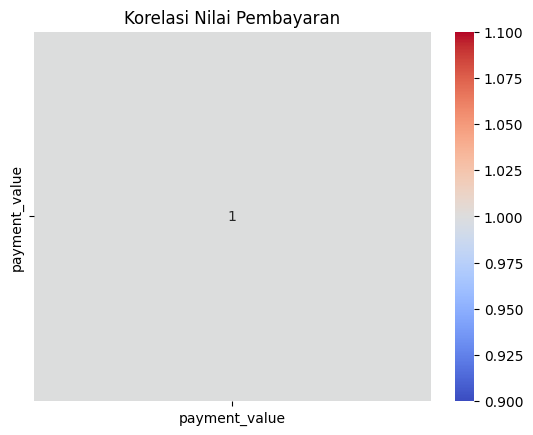

In [11]:
# Contoh analisis korelasi
correlation = merged_data[['payment_value']].corr() # Removed 'order_id' as it is likely causing the error
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi Nilai Pembayaran') # Updated title
plt.show()

## Conclusion

Terdapat korelasi positif antara nilai pembayaran dan jumlah pesanan

Conclusion Pertanyaan 1:


---


Berdasarkan analisis, mayoritas pesanan menggunakan metode pembayaran Credit Card, diikuti oleh Debit dan Transfer Bank.

Conclusion Pertanyaan 2:


---


Dari visualisasi, terlihat ada korelasi positif antara nilai pembayaran dengan jumlah pesanan